# Evaluación Numerica

In [69]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *

In [70]:
%matplotlib inline
#%matplotlib auto

In [71]:
# Aproximación de π

In [72]:
def pi(nmax = 10, emax=1e-3):
    s = 0
    n = 0
    s = s +(2**n*math.factorial(n)**2)/math.factorial(2*n+1)
    pi_old=2*s
    for n in range(1,nmax):
        s = s +(2**n*math.factorial(n)**2)/math.factorial(2*n+1)
        pi_new = 2*s
        e = abs(pi_new-pi_old)
        if e<emax:
            break
        pi_old = pi_new
    return pi_new,n

In [73]:
pi()

(3.140578169680336, 9)

In [74]:
# calculadora de ecs de 2do grado.

In [75]:
a = 1
b = 0
c = -1

def sol_2do_grado(a,b,c):
    if a==0:
        x=-c/b
        return x
    else:
        d = b**2-4*a*c
        if d<0:
            print('imag')
            x1 = complex(-b,(-d)**.5)/(2*a)
            x2 = complex(-b,-(-d)**.5)/(2*a)
        else: 
            print('reales')
            x1 = (-b+d**.5)/(2*a)
            x2 = (-b+d**.5)/(2*a)
        return x1,x2

In [76]:
sol_2do_grado(1,5,2)

reales


(-0.4384471871911697, -0.4384471871911697)

In [77]:
# Metodo

<function matplotlib.pyplot.show>

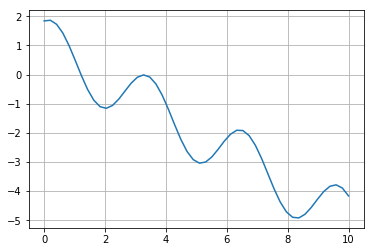

In [78]:
def f(x):
    return np.sin(2*x+1)-3*x/5+1

x = np.linspace(0,10)
plt.plot(x,f(x))
plt.grid(True)
plt.show

In [79]:
# Bisección raices

1.2096731607846891 3.33066907388e-16


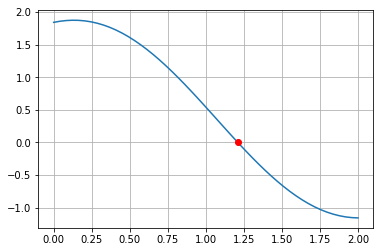

In [80]:
def f(x):
    return np.sin(2*x+1)-3*x/5+1

xinc = 0.
xfin = 2.
N = 100

for k in range(N):
    xr = (xinc+xfin)/2
    if f(xr)*f(xfin)<0:
        xinc = xr
    elif f(xr)*f(xinc)<0:
        xfin = xr
    elif f(xr)==0:
        break

print(xr,f(xr))

x = np.linspace(0,2)
plt.plot(x,f(x))
plt.plot(xr,f(xr),'ro')
plt.grid(True)
plt.show()


In [81]:
# Metodo de Newton-Raphson

-39968.0539657 23981.4205567


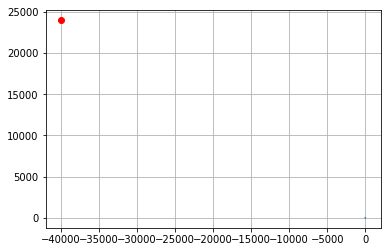

In [82]:
def f(x):
    return np.sin(2*x+1)-3*x/5+1
def fp(x):
    return 2*np.cos(2*x+1)-3/5

xr = 2
N = 100

for k in range(N):
    xr = xr-f(xr)/fp(xr)

print(xr,f(xr))

x = np.linspace(0,2)
plt.plot(x,f(x))
plt.plot(xr,f(xr),'ro')
plt.grid(True)
plt.show()




In [83]:
# Como resolver sistemas de ecuaciones Ax=b

In [84]:
A = np.array([[1,-1],[1.,2]])
b = np.array([1,3])

Ainv = np.linalg.inv(A)
x =Ainv.dot(b)
print(x)
print(A.dot(x)-b)


[ 1.66666667  0.66666667]
[ 0.  0.]


In [85]:
# Metodo de Cramer

In [86]:
A = np.array([[1,-1],[1.,2]])
b = np.array([1,3])

Ainv = np.linalg.inv(A)
x =Ainv.dot(b)
print(A.dot(x)-b)
print(x)

[ 0.  0.]
[ 1.66666667  0.66666667]


In [87]:
# Metodo de Newton-Raphson (para niños grandes)

In [88]:
def F(x):
    return np.array([x[0]**2+x[1]**2-1,4*x[0]**2/9+4*x[1]**2-1])

def J(x):
    return np.array ([[2*x[0],2*x[1]],[8*x[0]/9,8*x[1]]])

x = np.array([1.,1])
N = 10

for k in range(N):
    Jinv = np.linalg.inv(J(x))
    x = x-np.dot(Jinv,F(x))

print(x)
print(F(x))

[ 0.91855865  0.39528471]
[ 0.  0.]


In [89]:
x = np.array([1,2,3])
y = np.array([1,2,2])

A = np.ones((len(x),2))
A.T[0] = x

M = np.dot(A.T,A)
Minv = np.linalg.inv(M)

c = np.dot(A.T,y)

u = np.dot(Minv,c)

print(u) # [pendiente y ordenada]


[ 0.5         0.66666667]


In [90]:
x = np.array([1,2,3,4])
y = np.array([1,2,2,3])

A = np.ones((len(x),3))
A.T[0] = x**2
A.T[1] = x

M = np.dot(A.T,A)
Minv = np.linalg.inv(M)

c = np.dot(A.T,y)

u = np.dot(Minv,c)

print(u) # 


[  3.55271368e-15   6.00000000e-01   5.00000000e-01]


In [91]:
#Interpolación

In [92]:
x = np.array([1,2,3])
y = np.array([1,2,2])

A = np.ones((len(x),len(x)))
A.T[0] = x**2
A.T[1] = x

Ainv = np.linalg.inv(A)
u = np.dot(Ainv,y)

print(u)  


[-0.5  2.5 -1. ]


# Derivada y Integral numerica

1.0
[-25.  -5.   1.  11.  43.]


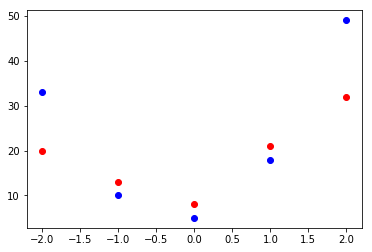

In [93]:
def f(x):
    return 3*x**3+2*x**2+5*x+1

def fp(x):
    return 9*x**2+4*x+5

N = 5
xinc = -2
xfin = 2

x = np.linspace(-2,2,N)
L = xfin-xinc
dx = L/(N-1)

print(dx)

y = f(x)

print(y)

yp = np.zeros(N)

for i in range(N):
    if i == 0:
        #hacia adelante
        yp[i] = (y[i+1]-y[i])/dx
    elif i == N-1:
        yp[i] = (y[i]-y[i-1])/dx
        #hacia atras
    else:
        #central
        yp[i] = (y[i+1]-y[i-1])/2*dx
            
plt.plot(x,fp(x),'bo')
plt.plot(x,yp,'ro')
plt.show()

In [94]:
#Metodo del trapecio

In [95]:
def f(x):
    return 3*x**3+2*x**2+5*x+1

N = 1000
xinc = -2
xfin = 2

x = np.linspace(xinc,xfin,N)
L =xfin-xinc

y = f(x)

I = 0.
for i in range(N-1):
    I = I+(y[i]+y[i+1])*(x[i+1]-x[i])/2
    
print(I)


14.6666880427


In [96]:
44/3

14.666666666666666

In [97]:
#Sol. EDO.
# *IVP (valor inicial) y *BVP (valor a la frontera)

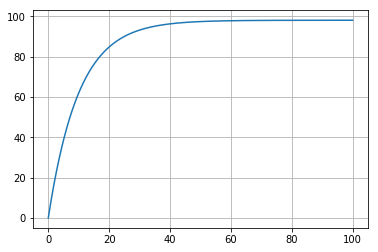

In [110]:
#Campo de direcciones
def f(v,t,g = 9.81,m = 1.,c=.1):
    return g-c*v/m

#Condición inicial
t = 0.
v = 0.

#Valores de ciclo
tfin = 100.
dt = 0.01

#solucion
tsol = [t]
vsol = [v]

#sol tiempo Euler
while t<tfin:
    v = f(v,t)*dt+v
    t = t+dt
    tsol.append(t)
    vsol.append(v)
    
plt.plot(tsol,vsol)
plt.grid(True)
plt.show()
